# **1. Perkenalan**
---
### **Final Project: Clusturn - Prediksi Customer Churn**

### **CLUSTERING NOTEBOOK UNTUK CUSTOMER SEGMENTATION**

**Group 2:** 
1. Azhar Muhammad
2. Nathanael August Zefanya
3. Pradita Ajeng Wiguna

Proyek ini bertujuan untuk membangun sistem peringatan dini proaktif menggunakan machine learning untuk mengidentifikasi pelanggan telekomunikasi yang berisiko tinggi untuk churn (berhenti berlangganan).


# **2. Import Libraries**
---
Pada tahap awal ini, saya mengimpor semua library yang diperlukan untuk proses pengolahan data, visualisasi, modeling, dan evaluasi model. Semua library saya kumpulkan dalam satu cell agar notebook lebih rapi.

In [78]:
# Import libraries
import pandas as pd
import numpy as np
import phik

# Libraries untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import StandardScaler
from kmodes.kprototypes import KPrototypes
from sklearn.decomposition import PCA
from feature_engine.outliers import Winsorizer

# Menyimpan model
import pickle

# Mengabaikan warning
import warnings
warnings.filterwarnings('ignore')

# **3. Data Loading**
---

In [79]:
# Load Dataset
# Dataset hasil preprocessing sebelumnya
# (sudah drop kolom yang tidak dipakai, sudah handle outlier, dll)
data = pd.read_csv('customer_churn_clean.csv')
data.head()

,call_failure,complains,subscription_length,charge_amount,seconds_of_use,frequency_of_use,frequency_of_sms,distinct_called_numbers,age_group,tariff_plan,status,age,customer_value,churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0


In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2850 entries, 0 to 2849
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   call_failure             2850 non-null   int64  
 1   complains                2850 non-null   int64  
 2   subscription_length      2850 non-null   int64  
 3   charge_amount            2850 non-null   int64  
 4   seconds_of_use           2850 non-null   int64  
 5   frequency_of_use         2850 non-null   int64  
 6   frequency_of_sms         2850 non-null   int64  
 7   distinct_called_numbers  2850 non-null   int64  
 8   age_group                2850 non-null   int64  
 9   tariff_plan              2850 non-null   int64  
 10  status                   2850 non-null   int64  
 11  age                      2850 non-null   int64  
 12  customer_value           2850 non-null   float64
 13  churn                    2850 non-null   int64  
dtypes: float64(1), int64(13)

In [81]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
call_failure,2850.0,7.802456,7.326172,0.0,1.0000,6.00,12.00,36.00
complains,2850.0,0.080702,0.272424,0.0,0.0000,0.00,0.00,1.00
subscription_length,2850.0,32.452982,8.723075,3.0,29.0000,35.00,38.00,47.00
charge_amount,2850.0,0.974737,1.550618,0.0,0.0000,0.00,2.00,10.00
seconds_of_use,2850.0,4534.243158,4199.712303,0.0,1458.7500,3041.00,6500.00,17090.00
frequency_of_use,2850.0,70.484912,57.401512,0.0,28.0000,54.50,96.00,255.00
frequency_of_sms,2850.0,73.789825,112.062397,0.0,7.0000,22.00,88.00,522.00
distinct_called_numbers,2850.0,23.870526,17.193929,0.0,11.0000,21.00,34.00,97.00
age_group,2850.0,2.835088,0.893503,1.0,2.0000,3.00,3.00,5.00
tariff_plan,2850.0,1.080351,0.271883,1.0,1.0000,1.00,1.00,2.00


In [82]:
data.columns

Index(['call_failure', 'complains', 'subscription_length', 'charge_amount',
       'seconds_of_use', 'frequency_of_use', 'frequency_of_sms',
       'distinct_called_numbers', 'age_group', 'tariff_plan', 'status', 'age',
       'customer_value', 'churn'],
      dtype='object')

In [83]:
df = data.copy()

# **4. Feature Engineering**
---

### **4.1. Missing Values Handling**

In [84]:
# Mengecek missing values pada dataset
df.isnull().sum()

call_failure               0
complains                  0
subscription_length        0
charge_amount              0
seconds_of_use             0
frequency_of_use           0
frequency_of_sms           0
distinct_called_numbers    0
age_group                  0
tariff_plan                0
status                     0
age                        0
customer_value             0
churn                      0
dtype: int64

### **4.2. Outlier Handling**

In [85]:
# Kolom numerik yang akan dicek skewness
num_cols = [
    'call_failure',
    'subscription_length',
    'seconds_of_use',
    'frequency_of_use',
    'frequency_of_sms',
    'distinct_called_numbers',
    'age',
    'customer_value'
]

# Cek skewness
listItem = []
for col in num_cols:
    skew_value = df[col].skew()
    distribusi = 'normal' if -0.5 <= skew_value <= 0.5 else 'skewed'
    listItem.append([col, round(skew_value, 3), distribusi])

skewness = pd.DataFrame(listItem, columns=['kolom', 'nilai skewness', 'distribusi'])
skewness


,kolom,nilai skewness,distribusi
0,call_failure,1.067,skewed
1,subscription_length,-1.253,skewed
2,seconds_of_use,1.315,skewed
3,frequency_of_use,1.146,skewed
4,frequency_of_sms,1.971,skewed
5,distinct_called_numbers,1.039,skewed
6,age,1.224,skewed
7,customer_value,1.422,skewed


Untuk memahami karakteristik distribusi dari masing-masing fitur numerik, dilakukan perhitungan nilai skewness. Skewness mengukur derajat kemiringan distribusi data; nilai mendekati 0 mengindikasikan distribusi yang simetris (normal), sedangkan nilai positif atau negatif yang besar menunjukkan distribusi yang miring ke kanan atau kiri.

Berikut hasil perhitungan skewness pada fitur numerik:
* Seluruh fitur numerik menunjukkan distribusi yang **skewed**, baik ke kanan (positif) maupun ke kiri (negatif). Hal ini penting untuk diperhatikan karena:
    - Algoritma machine learning berbasis jarak (seperti KNN, SVM) dan berbasis linearitas (seperti Logistic Regression) cenderung sensitif terhadap distribusi yang tidak normal.
    - Skewness yang tinggi dapat mempengaruhi stabilitas model dan interpretasi fitur.


**Handling Skewness: Winsorization**

Seluruh fitur numerik dalam dataset menunjukkan adanya skewness, baik ke kanan maupun ke kiri. Oleh karena itu, dilakukan penanganan skewness dengan menggunakan teknik **Winsorization** berbasis Interquartile Range (IQR). Winsorization merupakan metode capping outlier yang menjaga sebagian besar nilai data tetap dalam skala aslinya, namun membatasi pengaruh outlier ekstrem.

Parameter Winsorizer yang digunakan:

- Metode: IQR
- Tail: Both (kanan dan kiri)
- Fold: 1.5 (batas IQR default)


In [86]:
# List kolom numerik hasil analisis skewness
num_cols = [
    'call_failure',
    'subscription_length',
    'seconds_of_use',
    'frequency_of_use',
    'frequency_of_sms',
    'distinct_called_numbers',
    'age',
    'customer_value'
]

# Membuat objek winsorizer
# Di sini saya pakai method 'iqr' karena cukup aman untuk skewness
winsor = Winsorizer(capping_method='iqr',
                    tail='both',  # bisa disesuaikan 'right' jika hanya ingin handle upper outlier
                    fold=1.5,
                    variables=num_cols)

# Fit transformer pada data latih dan transform data latih
df_capped = winsor.fit_transform(df)


call_failure - Sebelum dilakukan Capping


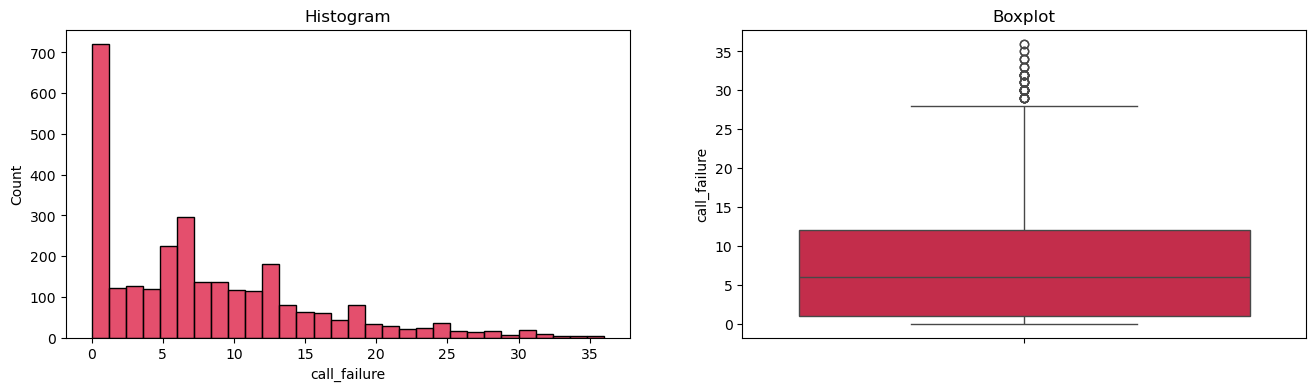


call_failure - Sesudah dilakukan Capping


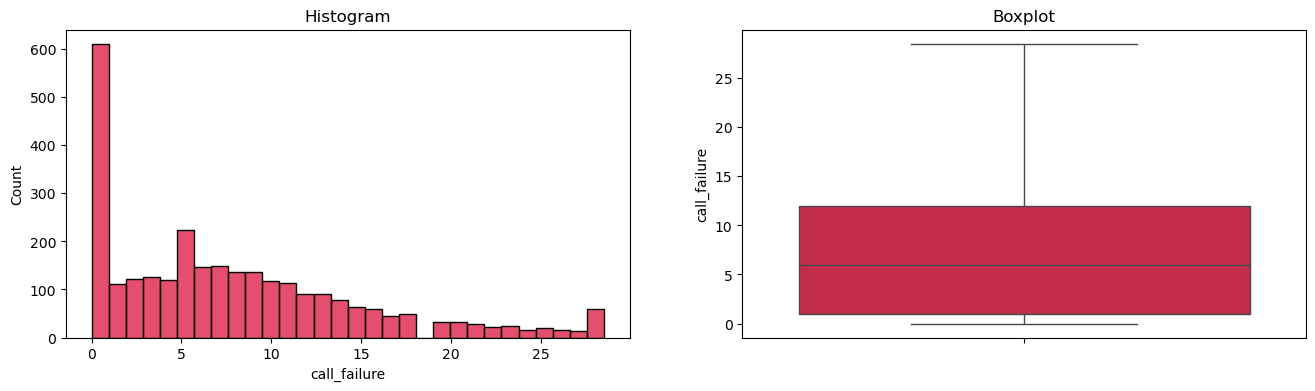

subscription_length - Sebelum dilakukan Capping


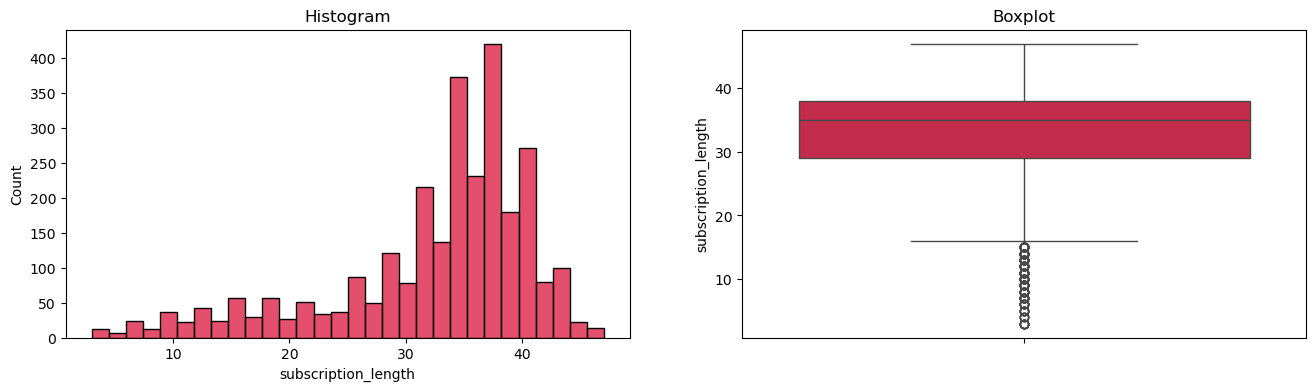


subscription_length - Sesudah dilakukan Capping


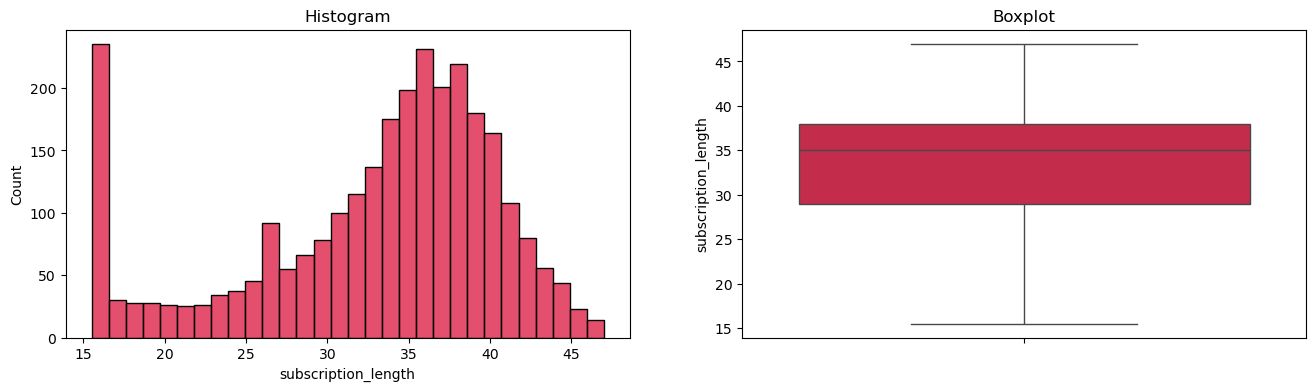

seconds_of_use - Sebelum dilakukan Capping


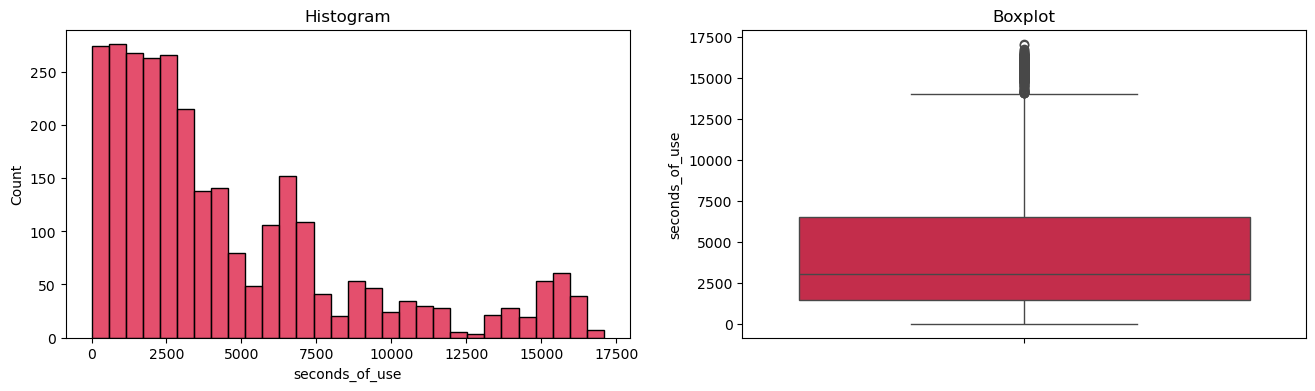


seconds_of_use - Sesudah dilakukan Capping


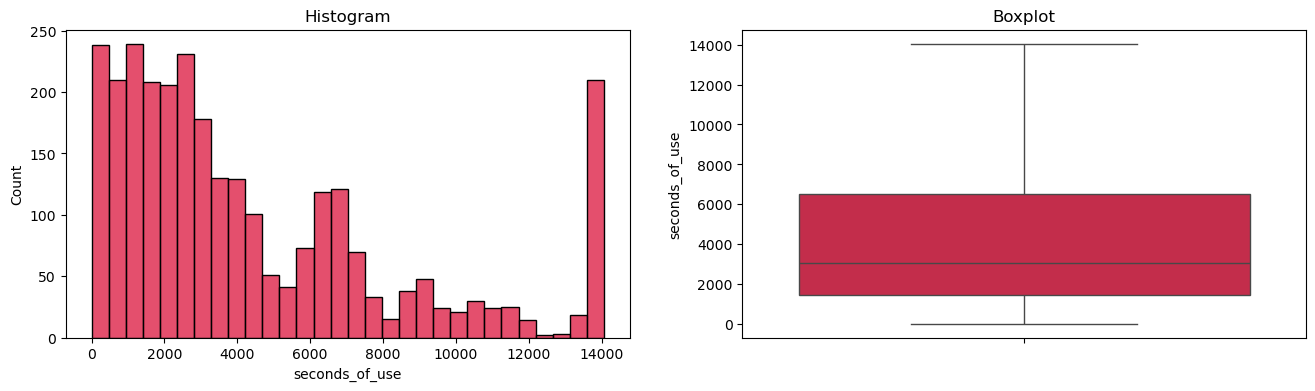

frequency_of_use - Sebelum dilakukan Capping


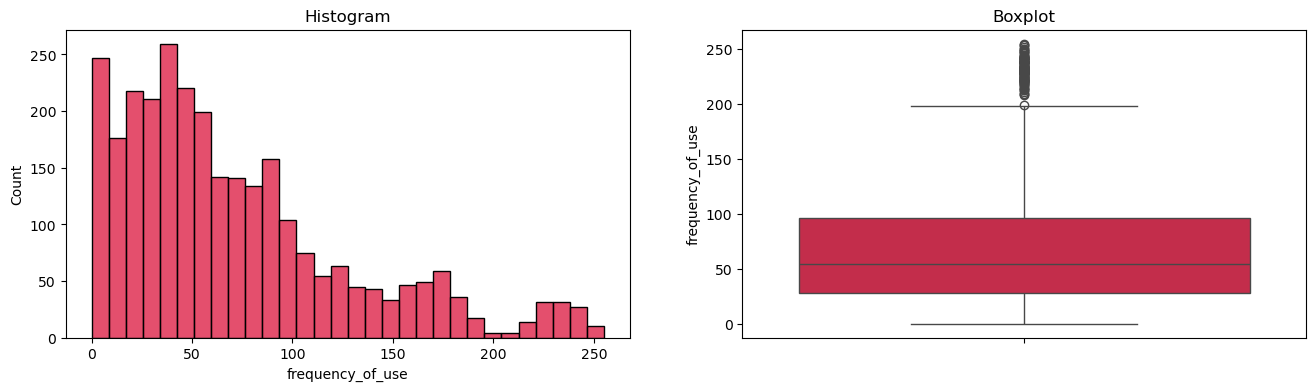


frequency_of_use - Sesudah dilakukan Capping


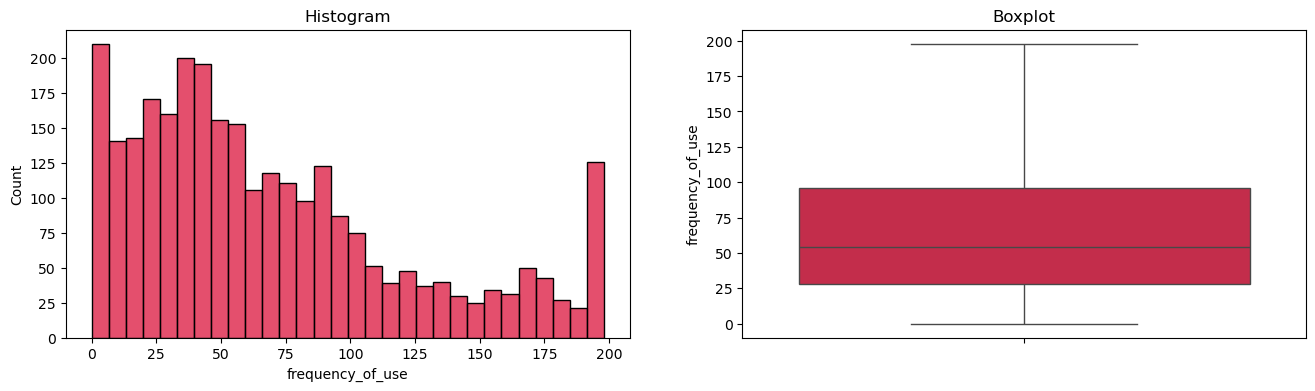

frequency_of_sms - Sebelum dilakukan Capping


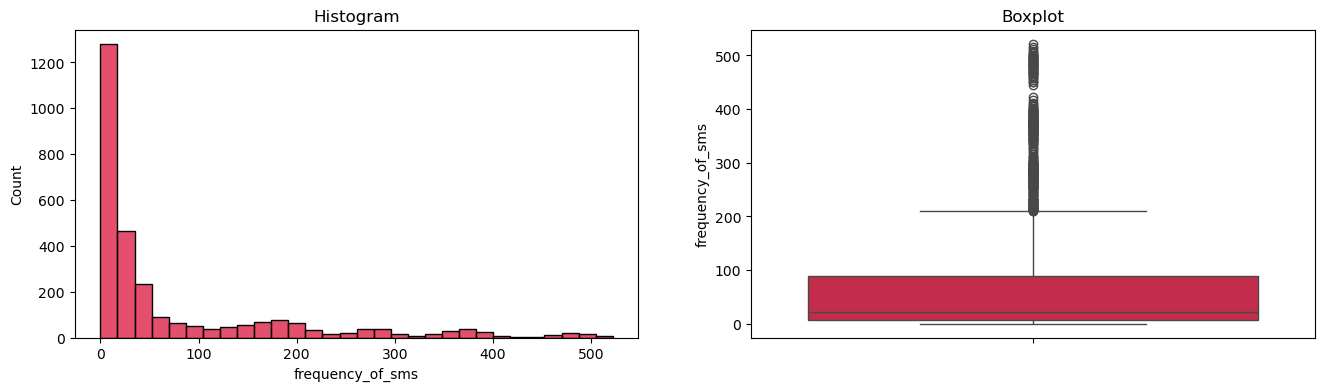


frequency_of_sms - Sesudah dilakukan Capping


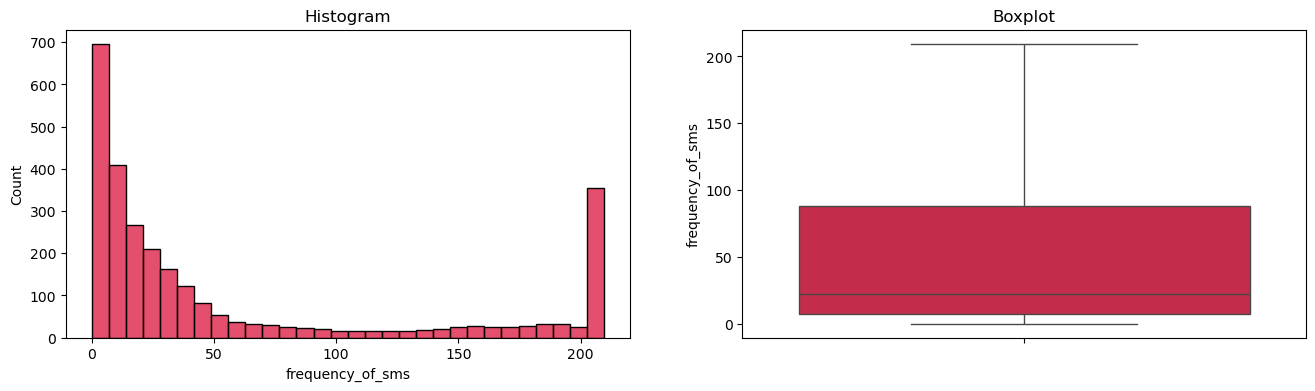

distinct_called_numbers - Sebelum dilakukan Capping


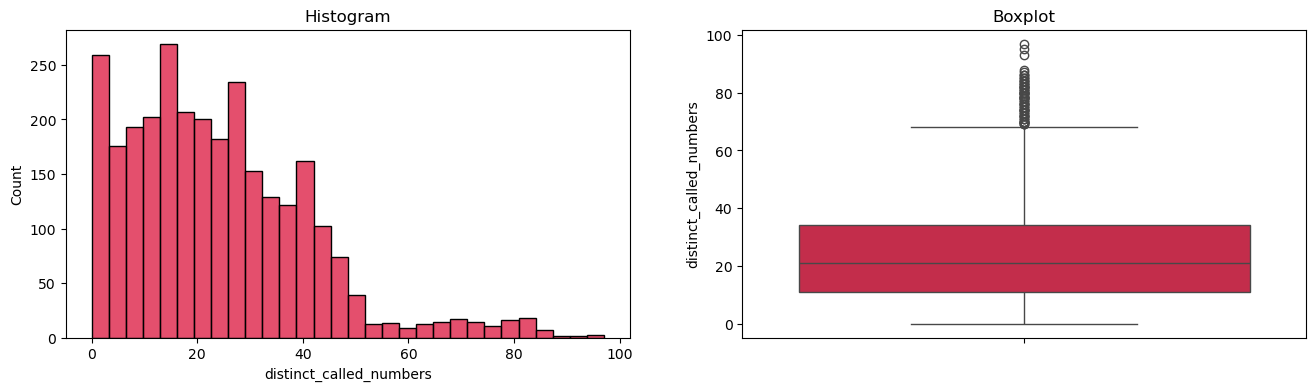


distinct_called_numbers - Sesudah dilakukan Capping


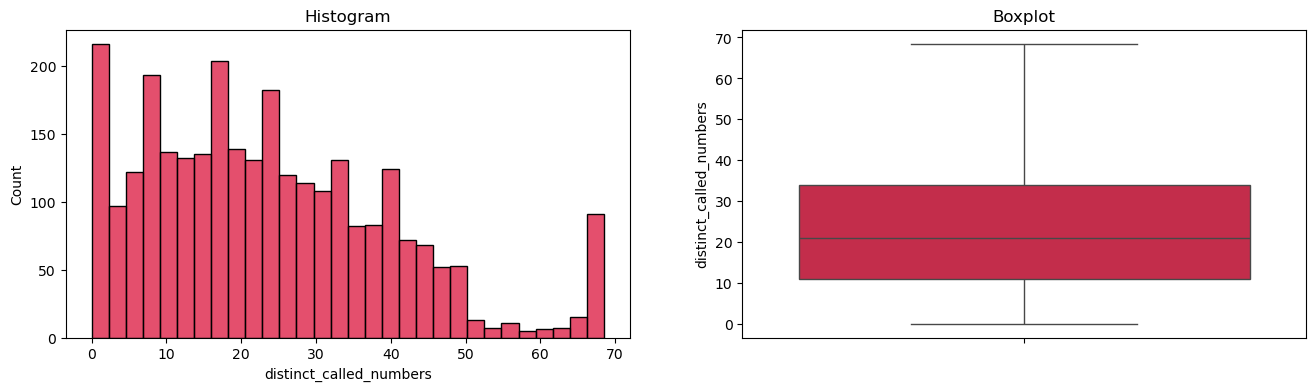

age - Sebelum dilakukan Capping


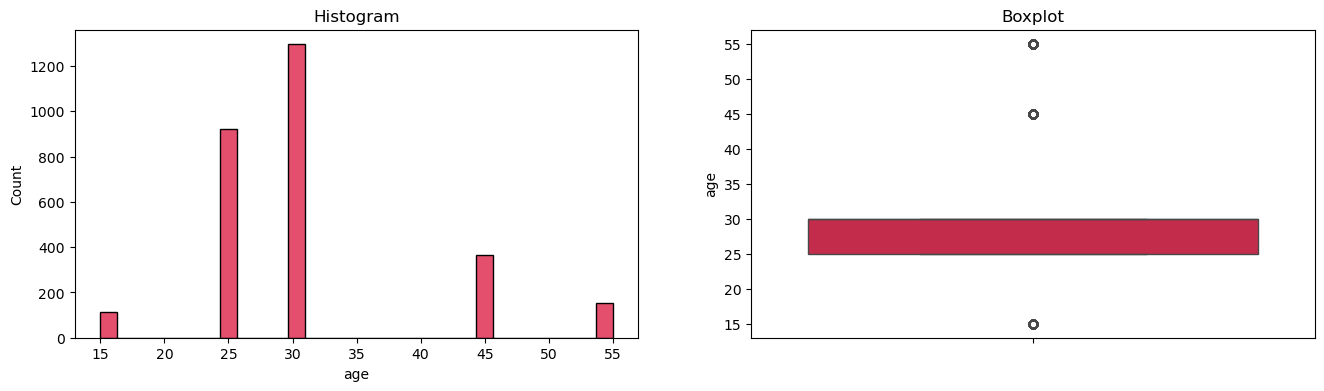


age - Sesudah dilakukan Capping


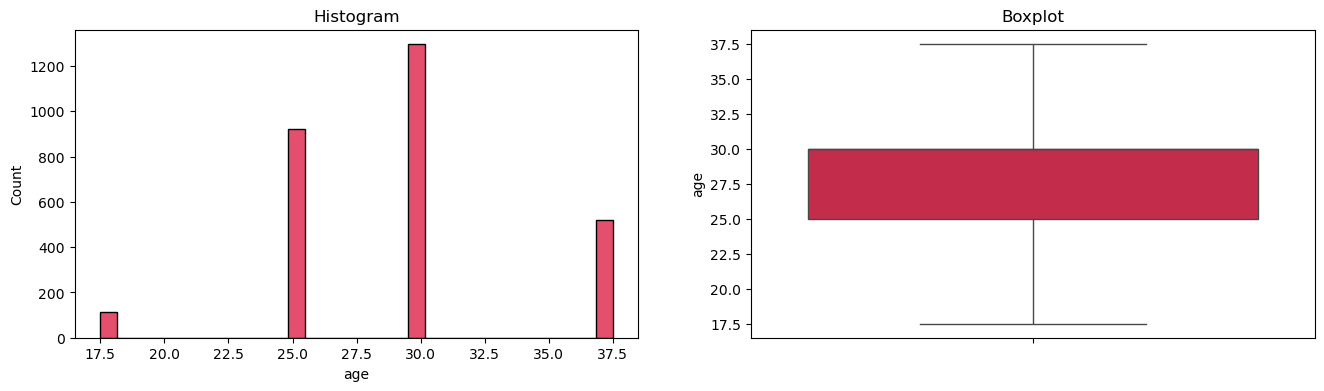

customer_value - Sebelum dilakukan Capping


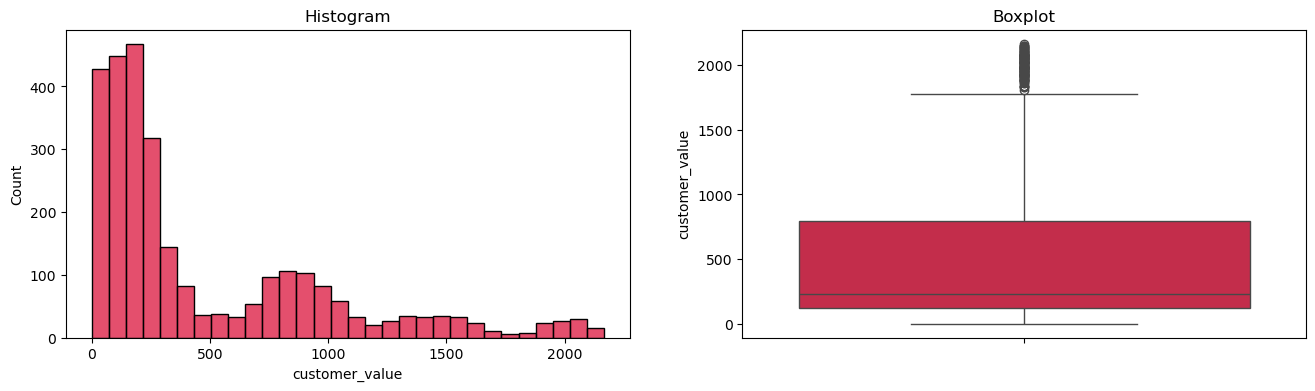


customer_value - Sesudah dilakukan Capping


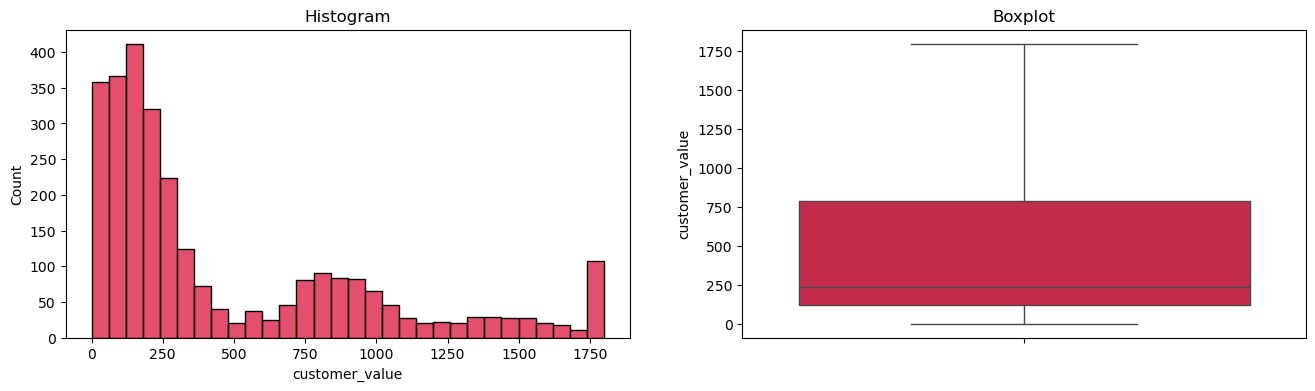

In [87]:
# Membuat visualisasi histogram dan boxplot
def plots(df, variables):
    plt.figure(figsize=(16, 4))

    # Menampilkan Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variables], bins=30, color='crimson')
    plt.title('Histogram')

    # Menampilkan Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variables], color='crimson')
    plt.title('Boxplot')

    # Menampilkan visualisasi
    plt.show()

# Melihat distribusi data sebelum dan setelah dilakukan capping
for col in num_cols:
  print(f'{col} - Sebelum dilakukan Capping')
  plots(df, col)

  print(f'\n{col} - Sesudah dilakukan Capping')
  plots(df_capped, col)

### **4.3. Feature Selection**

#### **4.3.1. Menguji Korelasi antar Fitur**

interval columns not set, guessing: ['call_failure', 'complains', 'subscription_length', 'charge_amount', 'seconds_of_use', 'frequency_of_use', 'frequency_of_sms', 'distinct_called_numbers', 'age_group', 'tariff_plan', 'status', 'age', 'customer_value', 'churn']


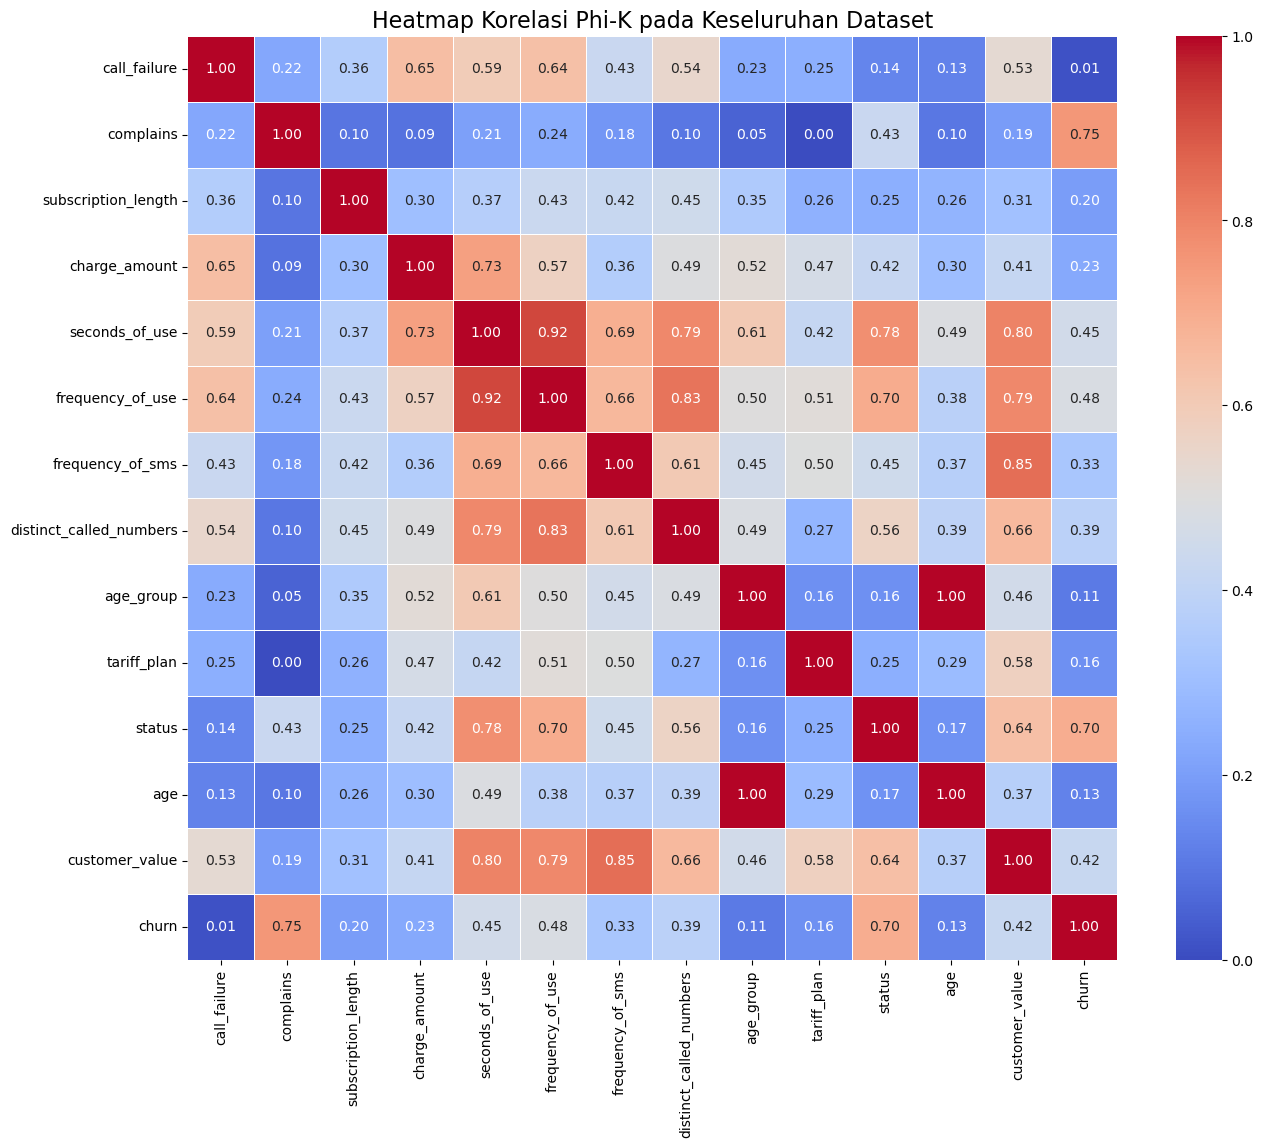

In [88]:
# Langkah 1: Hitung matriks korelasi Phi-K langsung pada seluruh data
phik_matrix_full = df_capped.phik_matrix()

# Langkah 2: Visualisasikan matriks sebagai heatmap
plt.figure(figsize=(15, 12))  # Mengatur ukuran gambar
sns.heatmap(
    phik_matrix_full,
    annot=True,          # Menampilkan nilai korelasi
    fmt=".2f",           # Format angka menjadi 2 desimal
    cmap='coolwarm',     # Gunakan skema warna yang intuitif untuk korelasi
    linewidths=.5
)
plt.title('Heatmap Korelasi Phi-K pada Keseluruhan Dataset', fontsize=16)
plt.show()

In [89]:
# Daftar kolom yang akan dihapus
columns_to_drop = [
    'call_failure', 
    'age',
    'frequency_of_sms',
    'churn'     
]
# Menghapus kolom dari df_capped
df_selected = df_capped.drop(columns=columns_to_drop)

# Menampilkan 5 data pertama
df_selected.head()

,complains,subscription_length,charge_amount,seconds_of_use,frequency_of_use,distinct_called_numbers,age_group,tariff_plan,status,customer_value
0,0,38.0,0,4370.0,71,17.0,3,1,1,197.640
1,0,39.0,0,318.0,5,4.0,2,1,2,46.035
2,0,37.0,0,2453.0,60,24.0,3,1,1,1536.520
3,0,38.0,0,4198.0,66,35.0,1,1,1,240.020
4,0,38.0,0,2393.0,58,33.0,1,1,1,145.805


#### **Preprocessing Pipeline**

In [90]:
# Kolom numerik (continuous)
numerical_cols_selected = ['subscription_length', 'seconds_of_use', 'frequency_of_use', 
                  'distinct_called_numbers', 'customer_value']

# Kolom ordinal (karena ada urutannya)
ordinal_cols_selected = ['charge_amount', 'age_group']

# Kolom kategorikal nominal (tanpa urutan)
categorical_cols_selected = ['complains', 'tariff_plan', 'status']

print(f"Kolom Numerik: {numerical_cols_selected}")
print(f"Kolom Ordinal: {ordinal_cols_selected}")
print(f"Kolom Kategorikal: {categorical_cols_selected}")

Kolom Numerik: ['subscription_length', 'seconds_of_use', 'frequency_of_use', 'distinct_called_numbers', 'customer_value']
Kolom Ordinal: ['charge_amount', 'age_group']
Kolom Kategorikal: ['complains', 'tariff_plan', 'status']


In [91]:
# Standardisasi numerik sebelum PCA
scaler = StandardScaler()
numerical_scaled = scaler.fit_transform(df[numerical_cols_selected])

In [92]:
# Inisialisasi PCA
pca = PCA()
# Fit PCA pada data yang sudah di-scale
pca.fit(numerical_scaled)

PCA()

Text(0, 0.5, 'Eigenvalues')

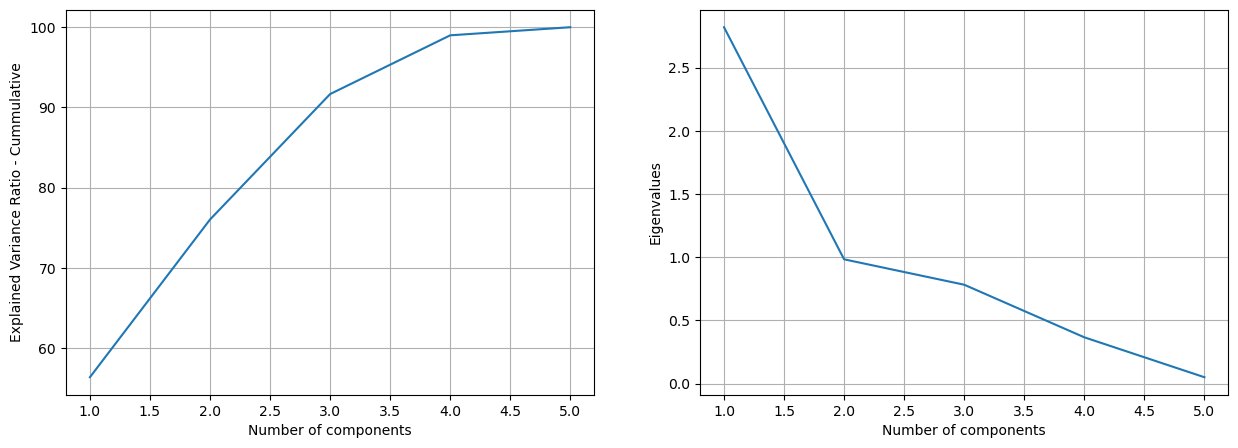

In [93]:
# Plot the Cummulative of Explained Variance Ratio
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.grid()
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel('Number of components')
plt.ylabel('Explained Variance Ratio - Cummulative')

# Plot the Eigenvalues
plt.subplot(1, 2, 2)
plt.grid()
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ )
plt.xlabel('Number of components')
plt.ylabel('Eigenvalues')

**Grafik Kiri — Cumulative Explained Variance Ratio**
* Dengan **1 komponen**: menjelaskan \~55% variansi.
* Dengan **2 komponen**: menjelaskan \~78% variansi.
* Dengan **3 komponen**: sudah menjelaskan \~91% variansi.
* Dengan **4 komponen**: sudah menjelaskan \~95% variansi.

**Grafik Kanan — Scree Plot (Eigenvalues)**

* Komponen 1 & 2 punya eigenvalue paling besar → paling informatif.
* Setelah komponen ke-2, eigenvalue mulai menurun signifikan.

In [94]:
# Cek jumlah fitur yang ingin dipertahankan jika kita ingin menyimpan 95% informasi
cumsum = np.cumsum(pca.explained_variance_ratio_)
num_features = np.argmax(cumsum >= 0.95) + 1
num_features

np.int64(4)

In [95]:
# PCA untuk kolom numerik
pca = PCA(n_components=4) 
numerical_pca = pca.fit_transform(numerical_scaled)

In [99]:
# Mendefinisikan urutan kolom sesuai urutan di df_cluster
numerical_pca_cols = [f'pca_{i}' for i in range(numerical_pca.shape[1])]
ordinal_cols = ordinal_cols_selected
categorical_cols = categorical_cols_selected

# Gabungkan semuanya dengan nama kolom lengkap
final_columns = numerical_pca_cols + ordinal_cols + categorical_cols

In [100]:
# Buat dataframe gabungan
df_cluster = pd.concat([
    pd.DataFrame(numerical_pca, columns=numerical_pca_cols),
    df[ordinal_cols].reset_index(drop=True),
    df[categorical_cols].astype(str).reset_index(drop=True)
], axis=1)

In [ ]:
# # Menggabungkan dengan kolom ordinal dan kategorikal
# df_ordinal = df[ordinal_cols_selected].reset_index(drop=True)
# df_categorical = df[categorical_cols_selected].astype(str).reset_index(drop=True)

In [ ]:
# # Menggabungkan semua jadi satu dataframe
# df_cluster = pd.concat([
#     pd.DataFrame(numerical_pca, columns=[f'pca_{i}' for i in range(numerical_pca.shape[1])]),
#     df[ordinal_cols_selected].reset_index(drop=True),
#     df[categorical_cols_selected].astype(str).reset_index(drop=True)
# ], axis=1)

In [103]:
# Dapatkan index kolom kategorikal setelah digabung
categorical_indices = [final_columns.index(col) for col in categorical_cols]

In [119]:
print("Final columns:", final_columns)
print("Categorical indices:", categorical_indices)
print("df_cluster.shape:", df_cluster.shape)
print("df_cluster.columns:", df_cluster.columns.tolist())

Final columns: ['pca_0', 'pca_1', 'pca_2', 'pca_3', 'charge_amount', 'age_group', 'complains', 'tariff_plan', 'status']
Categorical indices: [6, 7, 8]
df_cluster.shape: (2850, 9)
df_cluster.columns: ['pca_0', 'pca_1', 'pca_2', 'pca_3', 'charge_amount', 'age_group', 'complains', 'tariff_plan', 'status']


### **Menentukan Jumlah Cluster**


#### **Using Elbow Method**


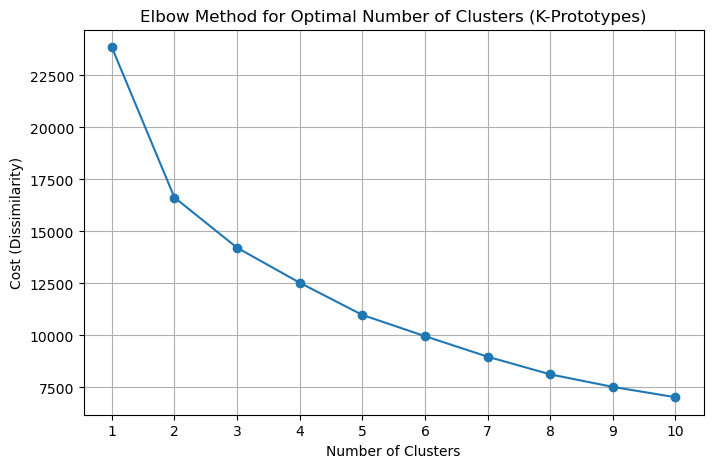

In [104]:
# Menyimpan cost untuk setiap jumlah cluster
cost = []
K = range(1, 11)  # coba dari 1 sampai 10 cluster

for k in K:
    kproto = KPrototypes(n_clusters=k, random_state=42, verbose=0)
    clusters = kproto.fit_predict(df_cluster, categorical=categorical_indices)
    cost.append(kproto.cost_)

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K, cost, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters (K-Prototypes)')
plt.xlabel('Number of Clusters')
plt.ylabel('Cost (Dissimilarity)')
plt.xticks(K)
plt.grid(True)
plt.show()


Analisis grafik:
* Cost masih menunjukkan pola penurunan yang signifikan dari cluster 1 hingga 3.
* Setelah cluster ke-4, penurunan Cost mulai melandai.
* Dari cluster 5 ke atas, meskipun Cost masih turun, tetapi tidak drastis

Dari grafik ini, elbow point paling terlihat di sekitar K=4. Setelah itu, penurunan Cost tidak lagi signifikan. Maka, K = 4 kemungkinan adalah jumlah klaster optimal.

# **5. Modeling**
---


### **5.1. Train Model dengan Jumlah Cluster yang Optimal**

In [105]:
# Train model dengan jumlah cluster yang optimal
# Inisialisasi model K-Means dengan 4 cluster
k_optimal = 4
kproto = KPrototypes(n_clusters=k_optimal, random_state=42)
clusters = kproto.fit_predict(df_cluster, categorical=categorical_indices)
# Menampilkan hasil prediksi
clusters

array([2, 2, 0, ..., 2, 1, 2], dtype=uint16)

### **5.2. Menggabungkan Label Cluster ke DataFrame Asli**

In [106]:
# Memasukkan label cluster ke DataFrame asli 
df_capped['cluster'] = clusters      # Menggunakan df_capped karena sudah dilakukan penanganan missing values dan capping ouliers
# Menampilkan dataset dengan label cluster
df_capped

,call_failure,complains,subscription_length,charge_amount,seconds_of_use,frequency_of_use,frequency_of_sms,distinct_called_numbers,age_group,tariff_plan,status,age,customer_value,churn,cluster
0,8.0,0,38.0,0,4370.0,71,5.0,17.0,3,1,1,30.0,197.640,0,2
1,0.0,0,39.0,0,318.0,5,7.0,4.0,2,1,2,25.0,46.035,0,2
2,10.0,0,37.0,0,2453.0,60,209.5,24.0,3,1,1,30.0,1536.520,0,0
3,10.0,0,38.0,0,4198.0,66,1.0,35.0,1,1,1,17.5,240.020,0,2
4,3.0,0,38.0,0,2393.0,58,2.0,33.0,1,1,1,17.5,145.805,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845,17.0,0,17.0,1,9237.0,177,80.0,42.0,5,1,1,37.5,261.210,0,3
2846,13.0,0,18.0,4,3157.0,51,38.0,21.0,3,1,1,30.0,280.320,0,0
2847,8.0,1,15.5,2,1792.0,25,7.0,9.0,3,1,1,30.0,100.680,1,2
2848,26.0,0,38.0,9,10740.0,99,8.0,44.0,5,2,1,37.5,174.585,0,1


In [107]:
# Menyimpan Dataset dengan Label Cluster
df_clustered = df_capped.copy()
df_clustered.to_csv('customer_clustered.csv', index=False)

### **5.3. Visualisasi Cluster 2D menggunakan 2 komponen PCA**

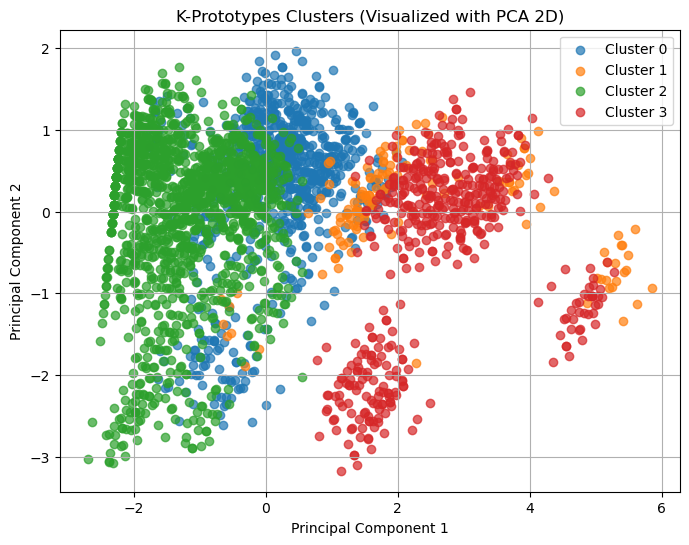

In [108]:
# Cluster visualization in 2D
pca_2d = PCA(n_components=2)
numerical_pca_2d = pca_2d.fit_transform(numerical_scaled)
# Transform data ke dalam ruang baru dengan 2 principal components
df_pca_2d = pd.DataFrame(numerical_pca_2d, columns=['PC1', 'PC2'])
df_pca_2d['cluster'] = clusters 
# Visualisasi hasil clustering
plt.figure(figsize=(8,6))
for cluster in sorted(df_pca_2d['cluster'].unique()):
    subset = df_pca_2d[df_pca_2d['cluster'] == cluster]
    plt.scatter(subset['PC1'], subset['PC2'], label=f'Cluster {cluster}', alpha=0.7)

plt.title('K-Prototypes Clusters (Visualized with PCA 2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

# **6. EDA - Setelah Clustering**
---

### **6.1. Distribusi Jumlah Nasabah dalam setiap Cluster**

In [109]:
df_clustered.head()

,call_failure,complains,subscription_length,charge_amount,seconds_of_use,frequency_of_use,frequency_of_sms,distinct_called_numbers,age_group,tariff_plan,status,age,customer_value,churn,cluster
0,8.0,0,38.0,0,4370.0,71,5.0,17.0,3,1,1,30.0,197.640,0,2
1,0.0,0,39.0,0,318.0,5,7.0,4.0,2,1,2,25.0,46.035,0,2
2,10.0,0,37.0,0,2453.0,60,209.5,24.0,3,1,1,30.0,1536.520,0,0
3,10.0,0,38.0,0,4198.0,66,1.0,35.0,1,1,1,17.5,240.020,0,2
4,3.0,0,38.0,0,2393.0,58,2.0,33.0,1,1,1,17.5,145.805,0,2


In [110]:
# Menampilkan jumlah anggota per cluster
df_clustered['cluster'].value_counts().sort_index()

cluster
0     785
1     144
2    1452
3     469
Name: count, dtype: int64

**Analisis Churn Rate per Segmen**

In [111]:
# Menghitung rata-rata churn rate untuk setiap segmen
churn_rate_per_segment = df_clustered.groupby('cluster')['churn'].mean() * 100
print(churn_rate_per_segment)

cluster
0     4.076433
1     0.000000
2    28.512397
3     0.000000
Name: churn, dtype: float64


| Cluster | Rata-rata Churn (%) | Interpretasi                                    |Persona / Nama Segmen | Jumlah |
| ------- | ------------------- | ----------------------------------------------- |----------------------| -------|
| 0       | **4.07%**           | Rendah, relatif stabil namun masih ada potensi churn minimal    | Potensial | 785|
| 1       | **0.0%**          | Pelanggan paling setia, tidak ada churn sama sekali di segmen ini | Juara Setia (Super Loyal) | 144|
| 2       | **28.51%**          | ⚠️ Tinggi – ini segmen paling berisiko | Waspada | 1452|
| 3       | **0.00%**           | 	Loyal juga – tidak ada churn | Setia |469|


* **Cluster 2**: Merupakan *cluster paling krusial* karena menyumbang **jumlah pelanggan terbesar** dan memiliki **churn rate tinggi (28%)**. Perlu pendekatan retensi proaktif.
* **Cluster 0**: Jumlah anggota cukup besar, dengan churn rendah. Perlu dipertahankan dengan layanan yang konsisten.
* **Cluster 1 & 3**: Tidak mengalami churn sama sekali. Mereka ini bisa dianggap sebagai pelanggan loyal. Bisa jadi role model untuk strategi retensi atau bahkan digunakan untuk upsell/cross-sell.



### **6.2. Analisis Statistik Deskriptif per Cluster**

**Karakteristik Cluster 0**

In [114]:
# Statistik Deskriptif Cluster 0
cluster_0 = df_clustered[df_clustered["cluster"] == 0]
cluster_0.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
call_failure,785.0,8.46,5.15,0.00,5.00,8.00,12.00,28.50
complains,785.0,0.02,0.15,0.00,0.00,0.00,0.00,1.00
subscription_length,785.0,34.82,7.60,15.50,32.00,37.00,40.00,46.00
charge_amount,785.0,1.54,1.00,0.00,1.00,1.00,2.00,4.00
seconds_of_use,785.0,4191.19,1853.56,598.00,2662.00,3965.00,6123.00,8210.00
frequency_of_use,785.0,67.42,26.55,8.00,45.00,69.00,89.00,124.00
frequency_of_sms,785.0,108.86,86.39,0.00,24.00,83.00,209.50,209.50
distinct_called_numbers,785.0,25.33,12.00,1.00,18.00,25.00,31.00,68.50
age_group,785.0,2.89,0.86,1.00,2.00,3.00,3.00,5.00
tariff_plan,785.0,1.10,0.29,1.00,1.00,1.00,1.00,2.00


**Cluster 0 – Pelanggan Aktif, Loyal, dan Bernilai Menengah**

* **Churn Rate**: 4.08% → **cukup rendah**
* **Usage**:

  * `seconds_of_use` 4.191 detik dan `frequency_of_use` 67 → **cukup aktif**
  * `frequency_of_sms` tinggi (108.86) → banyak kirim SMS
* **Keluhan**: sangat sedikit (`complains`: 0.02)
* **Loyalitas**: tinggi (`subscription_length`: 34.82 bulan)
* **Nilai pelanggan (`customer_value`)**: 740 → **menengah**
* **Demografi**: usia \~29 tahun, mayoritas `tariff_plan` = 1, `status` aktif

**Kesimpulan**:
Segmen pengguna **loyal dan cukup aktif**, bernilai **menengah**, serta memiliki churn yang rendah. Cocok untuk **dipertahankan dan ditingkatkan loyalty-nya**, bisa dengan program loyalitas atau promo.


**Karakteristik Cluster 1**

In [115]:
# Statistik Deskriptif Cluster 1
cluster_1 = df_clustered[df_clustered["cluster"] == 1]
cluster_1.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
call_failure,144.0,20.97,6.54,5.00,16.00,21.50,28.00,28.50
complains,144.0,0.12,0.33,0.00,0.00,0.00,0.00,1.00
subscription_length,144.0,35.99,5.55,16.00,34.00,37.00,40.00,46.00
charge_amount,144.0,5.88,1.97,4.00,4.00,5.00,8.00,10.00
seconds_of_use,144.0,10434.57,2956.29,3157.00,9420.00,10435.00,14061.88,14061.88
frequency_of_use,144.0,128.88,47.71,53.00,93.00,113.50,198.00,198.00
frequency_of_sms,144.0,60.93,74.07,0.00,7.00,22.50,72.75,209.50
distinct_called_numbers,144.0,44.26,12.08,21.00,36.75,42.00,48.00,68.50
age_group,144.0,3.51,1.04,2.00,3.00,3.00,4.00,5.00
tariff_plan,144.0,1.45,0.50,1.00,1.00,1.00,2.00,2.00


**Cluster 1 – High Usage, High Value, NO Churn**

* **Churn Rate**: 0% → **tidak ada churn**
* **Usage**: sangat tinggi

  * `seconds_of_use`: 10.434 detik
  * `frequency_of_use`: 128.88
  * `distinct_called_numbers`: 44.26
* **Loyalitas**: tinggi (langganan \~36 bulan)
* **Keluhan**: agak tinggi (`call_failure`: 20.97), tapi `complains` masih rendah (0.12)
* **Tariff Plan**: 45% sudah pakai plan 2
* **Customer Value**: 645 → sedikit di bawah Cluster 0
* **Demografi**: usia lebih tua (32.5 tahun), `age_group`: 3.5

**Kesimpulan**:
Segmen ini adalah **heavy users dengan nilai tinggi dan tidak churn sama sekali**. Meski call failure tinggi, mereka tetap bertahan. **Pertahankan segmen ini**, mungkin dengan **layanan prioritas atau premi**.

**Karakteristik Cluster 2**

In [116]:
# Statistik Deskriptif Cluster 2
cluster_1 = df_clustered[df_clustered["cluster"] == 2]
cluster_1.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
call_failure,1452.0,4.80,5.80,0.0,0.00,3.0,7.00,28.50
complains,1452.0,0.13,0.34,0.0,0.00,0.0,0.00,1.00
subscription_length,1452.0,31.85,7.43,15.5,28.00,34.0,37.00,47.00
charge_amount,1452.0,0.15,0.41,0.0,0.00,0.0,0.00,2.00
seconds_of_use,1452.0,1926.64,1512.79,0.0,763.75,1575.0,2780.00,6785.00
frequency_of_use,1452.0,34.71,24.92,0.0,14.00,31.0,52.00,125.00
frequency_of_sms,1452.0,23.93,44.67,0.0,0.00,9.0,24.00,209.50
distinct_called_numbers,1452.0,14.50,12.26,0.0,6.00,13.0,20.00,68.50
age_group,1452.0,2.75,0.85,1.0,2.00,3.0,3.00,5.00
tariff_plan,1452.0,1.02,0.14,1.0,1.00,1.0,1.00,2.00


**Cluster 2 – Pengguna Pasif dan Rentan Churn**

* **Churn Rate**: **28.5%** → sangat tinggi
* **Usage**:

  * `seconds_of_use`: hanya 1926 detik
  * `frequency_of_use`: 34
  * `frequency_of_sms`: hanya 23
  * `distinct_called_numbers`: rendah
* **Customer Value**: **terendah** (178.18)
* **Keluhan**: masih relatif rendah (`call_failure`: 4.8, `complains`: 0.13)
* **Tariff Plan**: hampir semua di plan 1
* **Loyalitas**: terendah (31.85 bulan)
* **Status**: banyak sudah tidak aktif (`status` mean = 1.47 → banyak nilai 2)

**Kesimpulan**:
Ini adalah segmen **pasif, bernilai rendah, dan rentan churn**. Mereka juga banyak yang **tidak aktif**. Perlu strategi retensi **atau bahkan offboarding**, seperti:

* Penawaran bundling
* Reminder reaktivasi
* Evaluasi biaya akuisisi

**Karakteristik Cluster 3**

In [117]:
# Statistik Deskriptif Cluster 3
cluster_1 = df_clustered[df_clustered["cluster"] == 3]
cluster_1.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
call_failure,469.0,11.70,7.45,0.0,6.00,11.00,17.00,28.50
complains,469.0,0.01,0.10,0.0,0.00,0.00,0.00,1.00
subscription_length,469.0,31.40,9.05,15.5,24.00,35.00,38.00,46.00
charge_amount,469.0,1.09,1.07,0.0,0.00,1.00,2.00,3.00
seconds_of_use,469.0,10802.75,2944.27,5377.0,8368.00,11160.00,14061.88,14061.88
frequency_of_use,469.0,160.04,27.00,104.0,137.00,163.00,182.00,198.00
frequency_of_sms,469.0,83.31,70.10,0.0,15.00,73.00,142.00,209.50
distinct_called_numbers,469.0,42.47,11.01,13.0,36.00,42.00,47.00,68.50
age_group,469.0,2.80,0.94,1.0,2.00,3.00,3.00,5.00
tariff_plan,469.0,1.13,0.33,1.0,1.00,1.00,1.00,2.00


**Cluster 3 – Super User dengan Nol Churn**

* **Churn Rate**: 0% → **tidak ada churn**
* **Usage**:

  * `seconds_of_use`: **tertinggi** (10.802)
  * `frequency_of_use`: 160
  * `frequency_of_sms`: tinggi (83)
  * `distinct_called_numbers`: 42.47
* **Customer Value**: **tertinggi** (852.5)
* **Keluhan**: rendah meskipun `call_failure` 11.7
* **Loyalitas**: 31.4 bulan
* **Tariff Plan**: mayoritas plan 1
* **Status**: semua masih aktif

**Kesimpulan**:
Ini adalah **segmen premium/super user** yang sangat aktif dan tidak churn. Mereka bernilai tinggi dan bisa menjadi **brand ambassador**. Berikan program **VIP treatment**, diskon eksklusif, atau early access ke fitur baru.

---

## Ringkasan Segmentasi

| Cluster | Churn Rate | Usage         | Value     | Loyalty | Rekomendasi                 |
| ------- | ---------- | ------------- | --------- | ------- | --------------------------- |
| 0       | 4%         | Menengah      | Menengah  | Tinggi  | Pertahankan                 |
| 1       | 0%         | Tinggi        | Tinggi    | Tinggi  | Prioritaskan, beri loyalty  |
| 2       | 28.5%      | Rendah        | Rendah    | Rendah  | Perlu intervensi / evaluasi |
| 3       | 0%         | Sangat Tinggi | Tertinggi | Tinggi  | VIP program, reward         |


# **7. Model Saving**
---


In [121]:
# Daftar fitur numerik
numerical_cols = ['subscription_length', 'seconds_of_use', 'frequency_of_use', 'distinct_called_numbers', 'customer_value']

# Daftar kategorikal
# Ini adalah daftar lengkap yang akan ditangani oleh K-Prototypes sebagai kategori
all_categorical_cols = ['charge_amount', 'age_group', 'complains', 'tariff_plan', 'status']
final_columns_order = df_selected.columns.tolist()

model_bundle = {
    'kproto_model': kproto,
    'pca_model': pca,
    'scaler': scaler,
    'numerical_cols': numerical_cols,
    'categorical_cols': all_categorical_cols,
    'final_columns_order': final_columns_order,
    'categorical_indices': categorical_indices  # <-- tambahkan ini!
}

with open('kproto_bundle.pkl', 'wb') as f:
    pickle.dump(model_bundle, f)